In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

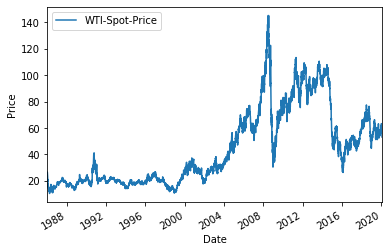

In [3]:
# Load the data
data =pd.read_excel(r'F:/研究生阶段/毕业设计/RWTCd.xls',sheet_name='s').set_index('Date')
# Plot the data
data.plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [5]:
import pmdarima as pm
train,test=data['1986-1-2':'2008-3-31'],data['2008-4-1':'2013-10-21']
#拟合一个ARIMA模型
arima=pm.ARIMA(order=(1,1,2),seasonal_order=(0,1,1,12))
arima.fit(data)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [6]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 8586
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood              -13389.182
Date:                            Sun, 09 Feb 2020   AIC                          26790.363
Time:                                    13:09:32   BIC                          26832.701
Sample:                                         0   HQIC                         26804.805
                                           - 8586                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.835e-05   7.81e-05     -0.235      0.814      -0.000       0.000
ar.L1         -0.4204      0.226     -1.858      0.063      -0.864       0.023
ma.L1          0.3741      0.226      1.654      0.098      -0.069       0.817
ma.L2         -0.0368      0.010     -3.739      0.000      -0.056      -0.017
ma.S.L12      -0.9975      0.001   -669.540      0.000      -1.000      -0.995
sigma2         1.3209      0.007    201.798      0.000       1.308       1.334
===================================================================================
Ljung-Box (Q):                      112.28   Jarque-Bera (JB):            125954.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.88   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

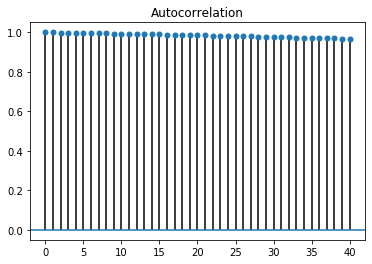

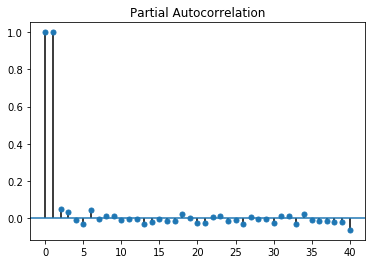

In [9]:
pm.acf(data)
pm.plot_acf(data)
pm.plot_pacf(data)

In [12]:
from pmdarima.arima.utils import ndiffs
n_adf = ndiffs(data, test='adf') 
print(n_adf)

1


In [13]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05,data)

SyntaxError: positional argument follows keyword argument (<ipython-input-13-2e884a3f6086>, line 2)